In [1]:
import torch
from tqdm import tqdm    # 进度条
import torch.nn as nn
from train_data_down import loader
from Model.protrain_model import combing_model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
model = combing_model().to(device)
epoches = 100
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
loss_list = []

In [6]:
for epoch in range(epoches):
    train_loss = 0.0
    model.train()
    # 创建进度条
    progress = tqdm(loader, desc=f'Epoch {epoch + 1}/{epoches}')
    for x in progress:
        x = x.to(device)
        x = x.squeeze(0)
        _, loss_2 = model(x)       # 前向传播
        loss = loss_2              # 自监督损失
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        # 更新进度条显示
        progress.set_postfix(loss=loss.item())
    epoch_train_loss = train_loss / len(loader)
    loss_list.append(epoch_train_loss)
    print(f'Epoch {epoch + 1} - Train Loss: {epoch_train_loss:.6f}')
    # 学习率衰减（每10个epoch）
    if (epoch+1) % 10 == 0:
        scheduler.step()
        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch {epoch + 1}: current_lr {current_lr:.6f}")

Epoch 1/100: 100%|██████████| 1800/1800 [02:33<00:00, 11.73it/s, loss=0.175] 


Epoch 1 - Train Loss: 0.2696


Epoch 2/100: 100%|██████████| 1800/1800 [02:34<00:00, 11.62it/s, loss=0.117] 


Epoch 2 - Train Loss: 0.1426


Epoch 3/100: 100%|██████████| 1800/1800 [02:33<00:00, 11.73it/s, loss=0.0888]


Epoch 3 - Train Loss: 0.1005


Epoch 4/100: 100%|██████████| 1800/1800 [02:36<00:00, 11.53it/s, loss=0.0617]


Epoch 4 - Train Loss: 0.0804


Epoch 5/100: 100%|██████████| 1800/1800 [02:32<00:00, 11.82it/s, loss=0.0546]


Epoch 5 - Train Loss: 0.0693


Epoch 6/100: 100%|██████████| 1800/1800 [02:34<00:00, 11.68it/s, loss=0.0521]


Epoch 6 - Train Loss: 0.0615


Epoch 7/100: 100%|██████████| 1800/1800 [02:33<00:00, 11.75it/s, loss=0.0537]


Epoch 7 - Train Loss: 0.0561


Epoch 8/100: 100%|██████████| 1800/1800 [02:31<00:00, 11.85it/s, loss=0.0429]


Epoch 8 - Train Loss: 0.0523


Epoch 9/100: 100%|██████████| 1800/1800 [02:34<00:00, 11.66it/s, loss=0.0365]


Epoch 9 - Train Loss: 0.0495


Epoch 10/100: 100%|██████████| 1800/1800 [02:33<00:00, 11.71it/s, loss=0.0344] 


Epoch 10 - Train Loss: 0.0470
Epoch 10: current_lr 0.000100


Epoch 11/100: 100%|██████████| 1800/1800 [02:38<00:00, 11.39it/s, loss=0.0407] 


Epoch 11 - Train Loss: 0.0453


Epoch 12/100: 100%|██████████| 1800/1800 [02:35<00:00, 11.58it/s, loss=0.0308] 


Epoch 12 - Train Loss: 0.0435


Epoch 13/100: 100%|██████████| 1800/1800 [02:37<00:00, 11.43it/s, loss=0.0343] 


Epoch 13 - Train Loss: 0.0420


Epoch 14/100: 100%|██████████| 1800/1800 [02:35<00:00, 11.57it/s, loss=0.0314] 


Epoch 14 - Train Loss: 0.0408


Epoch 15/100: 100%|██████████| 1800/1800 [02:36<00:00, 11.47it/s, loss=0.0343] 


Epoch 15 - Train Loss: 0.0398


Epoch 16/100: 100%|██████████| 1800/1800 [02:38<00:00, 11.36it/s, loss=0.027]  


Epoch 16 - Train Loss: 0.0386


Epoch 17/100: 100%|██████████| 1800/1800 [02:36<00:00, 11.52it/s, loss=0.0358] 


Epoch 17 - Train Loss: 0.0376


Epoch 18/100: 100%|██████████| 1800/1800 [02:38<00:00, 11.37it/s, loss=0.0287] 


Epoch 18 - Train Loss: 0.0367


Epoch 19/100: 100%|██████████| 1800/1800 [02:36<00:00, 11.47it/s, loss=0.0279] 


Epoch 19 - Train Loss: 0.0358


Epoch 20/100: 100%|██████████| 1800/1800 [02:38<00:00, 11.32it/s, loss=0.0342] 


Epoch 20 - Train Loss: 0.0350
Epoch 20: current_lr 0.000100


Epoch 21/100: 100%|██████████| 1800/1800 [02:37<00:00, 11.46it/s, loss=0.0239] 


Epoch 21 - Train Loss: 0.0343


Epoch 22/100: 100%|██████████| 1800/1800 [02:39<00:00, 11.28it/s, loss=0.0247] 


Epoch 22 - Train Loss: 0.0336


Epoch 23/100: 100%|██████████| 1800/1800 [02:38<00:00, 11.39it/s, loss=0.0258] 


Epoch 23 - Train Loss: 0.0332


Epoch 24/100: 100%|██████████| 1800/1800 [02:30<00:00, 11.97it/s, loss=0.0281] 


Epoch 24 - Train Loss: 0.0324


Epoch 25/100: 100%|██████████| 1800/1800 [02:35<00:00, 11.59it/s, loss=0.0221] 


Epoch 25 - Train Loss: 0.0317


Epoch 26/100: 100%|██████████| 1800/1800 [02:31<00:00, 11.92it/s, loss=0.0266] 


Epoch 26 - Train Loss: 0.0311


Epoch 27/100: 100%|██████████| 1800/1800 [02:34<00:00, 11.65it/s, loss=0.0238] 


Epoch 27 - Train Loss: 0.0307


Epoch 28/100: 100%|██████████| 1800/1800 [02:31<00:00, 11.87it/s, loss=0.0282] 


Epoch 28 - Train Loss: 0.0302


Epoch 29/100: 100%|██████████| 1800/1800 [02:32<00:00, 11.78it/s, loss=0.0232] 


Epoch 29 - Train Loss: 0.0296


Epoch 30/100: 100%|██████████| 1800/1800 [02:33<00:00, 11.71it/s, loss=0.0245] 


Epoch 30 - Train Loss: 0.0291
Epoch 30: current_lr 0.000100


Epoch 31/100: 100%|██████████| 1800/1800 [02:30<00:00, 11.93it/s, loss=0.0237] 


Epoch 31 - Train Loss: 0.0287


Epoch 32/100: 100%|██████████| 1800/1800 [02:35<00:00, 11.60it/s, loss=0.0218] 


Epoch 32 - Train Loss: 0.0282


Epoch 33/100: 100%|██████████| 1800/1800 [02:30<00:00, 11.93it/s, loss=0.0256] 


Epoch 33 - Train Loss: 0.0279


Epoch 34/100: 100%|██████████| 1800/1800 [02:34<00:00, 11.67it/s, loss=0.0262] 


Epoch 34 - Train Loss: 0.0274


Epoch 35/100: 100%|██████████| 1800/1800 [02:33<00:00, 11.75it/s, loss=0.0229] 


Epoch 35 - Train Loss: 0.0269


Epoch 36/100: 100%|██████████| 1800/1800 [02:32<00:00, 11.79it/s, loss=0.0202] 


Epoch 36 - Train Loss: 0.0266


Epoch 37/100: 100%|██████████| 1800/1800 [02:34<00:00, 11.68it/s, loss=0.0206] 


Epoch 37 - Train Loss: 0.0263


Epoch 38/100: 100%|██████████| 1800/1800 [02:30<00:00, 11.93it/s, loss=0.0194] 


Epoch 38 - Train Loss: 0.0259


Epoch 39/100: 100%|██████████| 1800/1800 [02:34<00:00, 11.61it/s, loss=0.0199] 


Epoch 39 - Train Loss: 0.0255


Epoch 40/100: 100%|██████████| 1800/1800 [02:31<00:00, 11.91it/s, loss=0.0191] 


Epoch 40 - Train Loss: 0.0252
Epoch 40: current_lr 0.000100


Epoch 41/100: 100%|██████████| 1800/1800 [02:33<00:00, 11.71it/s, loss=0.0212] 


Epoch 41 - Train Loss: 0.0248


Epoch 42/100: 100%|██████████| 1800/1800 [02:32<00:00, 11.78it/s, loss=0.022]  


Epoch 42 - Train Loss: 0.0246


Epoch 43/100: 100%|██████████| 1800/1800 [02:32<00:00, 11.78it/s, loss=0.0174] 


Epoch 43 - Train Loss: 0.0241


Epoch 44/100: 100%|██████████| 1800/1800 [02:34<00:00, 11.62it/s, loss=0.0209] 


Epoch 44 - Train Loss: 0.0238


Epoch 45/100: 100%|██████████| 1800/1800 [02:47<00:00, 10.74it/s, loss=0.0207] 


Epoch 45 - Train Loss: 0.0234


Epoch 46/100: 100%|██████████| 1800/1800 [03:07<00:00,  9.62it/s, loss=0.0161] 


Epoch 46 - Train Loss: 0.0233


Epoch 47/100: 100%|██████████| 1800/1800 [03:15<00:00,  9.20it/s, loss=0.0181] 


Epoch 47 - Train Loss: 0.0229


Epoch 48/100: 100%|██████████| 1800/1800 [03:13<00:00,  9.30it/s, loss=0.0201] 


Epoch 48 - Train Loss: 0.0225


Epoch 49/100: 100%|██████████| 1800/1800 [03:10<00:00,  9.43it/s, loss=0.0175] 


Epoch 49 - Train Loss: 0.0224


Epoch 50/100: 100%|██████████| 1800/1800 [03:05<00:00,  9.69it/s, loss=0.0161] 


Epoch 50 - Train Loss: 0.0220
Epoch 50: current_lr 0.000100


Epoch 51/100: 100%|██████████| 1800/1800 [03:06<00:00,  9.64it/s, loss=0.0182] 


Epoch 51 - Train Loss: 0.0217


Epoch 52/100: 100%|██████████| 1800/1800 [03:04<00:00,  9.75it/s, loss=0.0166] 


Epoch 52 - Train Loss: 0.0214


Epoch 53/100: 100%|██████████| 1800/1800 [03:04<00:00,  9.73it/s, loss=0.016]  


Epoch 53 - Train Loss: 0.0213


Epoch 54/100: 100%|██████████| 1800/1800 [03:10<00:00,  9.43it/s, loss=0.017]  


Epoch 54 - Train Loss: 0.0209


Epoch 55/100: 100%|██████████| 1800/1800 [03:12<00:00,  9.36it/s, loss=0.0159] 


Epoch 55 - Train Loss: 0.0207


Epoch 56/100: 100%|██████████| 1800/1800 [03:12<00:00,  9.33it/s, loss=0.0188] 


Epoch 56 - Train Loss: 0.0205


Epoch 57/100: 100%|██████████| 1800/1800 [03:13<00:00,  9.28it/s, loss=0.0171] 


Epoch 57 - Train Loss: 0.0204


Epoch 58/100: 100%|██████████| 1800/1800 [03:14<00:00,  9.25it/s, loss=0.0136] 


Epoch 58 - Train Loss: 0.0200


Epoch 59/100: 100%|██████████| 1800/1800 [03:12<00:00,  9.36it/s, loss=0.0188] 


Epoch 59 - Train Loss: 0.0197


Epoch 60/100: 100%|██████████| 1800/1800 [03:15<00:00,  9.21it/s, loss=0.0134] 


Epoch 60 - Train Loss: 0.0195
Epoch 60: current_lr 0.000100


Epoch 61/100: 100%|██████████| 1800/1800 [03:16<00:00,  9.18it/s, loss=0.0172] 


Epoch 61 - Train Loss: 0.0194


Epoch 62/100: 100%|██████████| 1800/1800 [03:14<00:00,  9.25it/s, loss=0.016]  


Epoch 62 - Train Loss: 0.0191


Epoch 63/100: 100%|██████████| 1800/1800 [03:16<00:00,  9.15it/s, loss=0.0176] 


Epoch 63 - Train Loss: 0.0189


Epoch 64/100: 100%|██████████| 1800/1800 [03:17<00:00,  9.09it/s, loss=0.0151] 


Epoch 64 - Train Loss: 0.0187


Epoch 65/100: 100%|██████████| 1800/1800 [03:18<00:00,  9.09it/s, loss=0.0164] 


Epoch 65 - Train Loss: 0.0185


Epoch 66/100: 100%|██████████| 1800/1800 [03:17<00:00,  9.10it/s, loss=0.0147] 


Epoch 66 - Train Loss: 0.0183


Epoch 67/100: 100%|██████████| 1800/1800 [03:15<00:00,  9.18it/s, loss=0.0147] 


Epoch 67 - Train Loss: 0.0181


Epoch 68/100: 100%|██████████| 1800/1800 [03:14<00:00,  9.25it/s, loss=0.0144] 


Epoch 68 - Train Loss: 0.0179


Epoch 69/100: 100%|██████████| 1800/1800 [03:13<00:00,  9.30it/s, loss=0.0154] 


Epoch 69 - Train Loss: 0.0177


Epoch 70/100: 100%|██████████| 1800/1800 [03:14<00:00,  9.25it/s, loss=0.0137] 


Epoch 70 - Train Loss: 0.0175
Epoch 70: current_lr 0.000100


Epoch 71/100: 100%|██████████| 1800/1800 [03:10<00:00,  9.44it/s, loss=0.0133] 


Epoch 71 - Train Loss: 0.0172


Epoch 72/100: 100%|██████████| 1800/1800 [03:05<00:00,  9.68it/s, loss=0.0136] 


Epoch 72 - Train Loss: 0.0171


Epoch 73/100: 100%|██████████| 1800/1800 [03:11<00:00,  9.42it/s, loss=0.0144] 


Epoch 73 - Train Loss: 0.0170


Epoch 74/100: 100%|██████████| 1800/1800 [03:09<00:00,  9.52it/s, loss=0.0133] 


Epoch 74 - Train Loss: 0.0168


Epoch 75/100: 100%|██████████| 1800/1800 [03:09<00:00,  9.49it/s, loss=0.0135] 


Epoch 75 - Train Loss: 0.0167


Epoch 76/100: 100%|██████████| 1800/1800 [03:42<00:00,  8.09it/s, loss=0.015]  


Epoch 76 - Train Loss: 0.0165


Epoch 77/100: 100%|██████████| 1800/1800 [04:40<00:00,  6.41it/s, loss=0.0128] 


Epoch 77 - Train Loss: 0.0163


Epoch 78/100: 100%|██████████| 1800/1800 [04:21<00:00,  6.88it/s, loss=0.0128] 


Epoch 78 - Train Loss: 0.0161


Epoch 79/100: 100%|██████████| 1800/1800 [04:19<00:00,  6.94it/s, loss=0.0123] 


Epoch 79 - Train Loss: 0.0158


Epoch 80/100: 100%|██████████| 1800/1800 [04:18<00:00,  6.95it/s, loss=0.0165] 


Epoch 80 - Train Loss: 0.0158
Epoch 80: current_lr 0.000100


Epoch 81/100: 100%|██████████| 1800/1800 [04:33<00:00,  6.58it/s, loss=0.0111] 


Epoch 81 - Train Loss: 0.0156


Epoch 82/100: 100%|██████████| 1800/1800 [04:36<00:00,  6.51it/s, loss=0.0102] 


Epoch 82 - Train Loss: 0.0155


Epoch 83/100: 100%|██████████| 1800/1800 [04:26<00:00,  6.76it/s, loss=0.0143] 


Epoch 83 - Train Loss: 0.0154


Epoch 84/100: 100%|██████████| 1800/1800 [04:43<00:00,  6.35it/s, loss=0.0112] 


Epoch 84 - Train Loss: 0.0151


Epoch 85/100: 100%|██████████| 1800/1800 [04:46<00:00,  6.27it/s, loss=0.0141] 


Epoch 85 - Train Loss: 0.0150


Epoch 86/100: 100%|██████████| 1800/1800 [04:41<00:00,  6.40it/s, loss=0.0119] 


Epoch 86 - Train Loss: 0.0149


Epoch 87/100: 100%|██████████| 1800/1800 [04:40<00:00,  6.41it/s, loss=0.0119] 


Epoch 87 - Train Loss: 0.0148


Epoch 88/100: 100%|██████████| 1800/1800 [04:26<00:00,  6.76it/s, loss=0.0125] 


Epoch 88 - Train Loss: 0.0147


Epoch 89/100: 100%|██████████| 1800/1800 [04:00<00:00,  7.47it/s, loss=0.00951]


Epoch 89 - Train Loss: 0.0144


Epoch 90/100: 100%|██████████| 1800/1800 [04:01<00:00,  7.45it/s, loss=0.0122] 


Epoch 90 - Train Loss: 0.0143
Epoch 90: current_lr 0.000100


Epoch 91/100: 100%|██████████| 1800/1800 [04:01<00:00,  7.46it/s, loss=0.0107] 


Epoch 91 - Train Loss: 0.0142


Epoch 92/100: 100%|██████████| 1800/1800 [04:00<00:00,  7.48it/s, loss=0.0105] 


Epoch 92 - Train Loss: 0.0141


Epoch 93/100: 100%|██████████| 1800/1800 [04:01<00:00,  7.45it/s, loss=0.00931]


Epoch 93 - Train Loss: 0.0139


Epoch 94/100: 100%|██████████| 1800/1800 [04:01<00:00,  7.47it/s, loss=0.0107] 


Epoch 94 - Train Loss: 0.0137


Epoch 95/100: 100%|██████████| 1800/1800 [03:59<00:00,  7.50it/s, loss=0.00916]


Epoch 95 - Train Loss: 0.0136


Epoch 96/100: 100%|██████████| 1800/1800 [03:57<00:00,  7.59it/s, loss=0.0204] 


Epoch 96 - Train Loss: 0.0134


Epoch 97/100: 100%|██████████| 1800/1800 [04:09<00:00,  7.21it/s, loss=0.0103] 


Epoch 97 - Train Loss: 0.0134


Epoch 98/100: 100%|██████████| 1800/1800 [04:01<00:00,  7.46it/s, loss=0.00988]


Epoch 98 - Train Loss: 0.0132


Epoch 99/100: 100%|██████████| 1800/1800 [03:59<00:00,  7.52it/s, loss=0.0111] 


Epoch 99 - Train Loss: 0.0132


Epoch 100/100: 100%|██████████| 1800/1800 [03:58<00:00,  7.54it/s, loss=0.0101] 

Epoch 100 - Train Loss: 0.0132
Epoch 100: current_lr 0.000010


In [7]:
# 保存模型
torch.save(model.state_dict(), "pre_train.pth")

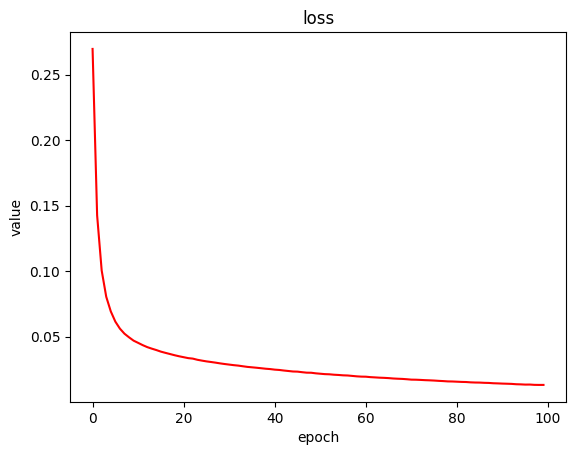

In [8]:
import matplotlib.pyplot as plt
# 绘制曲线
plt.plot(loss_list, label='loss', color='red')
# 添加标题和图例
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('value')
# 显示图形
plt.show()